In [93]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt  
import seaborn as sns
print('==end==')

==end==


In [55]:
# tool: get motif and site form string;
import re

def getMotif(s1):
    motifs=['AATAAA', 'ATTAAA','TATAAA','AGTAAA','AATACA','CATAAA','AATATA','GATAAA']
    
    for motif in motifs:
        rs=re.search(motif,s1)
        if rs!=None:
            start=rs.span()[0];
            return([motif, len(s1)-start])
    return(None)

s2='CAGGCTCGTTTTACCTCATTCTAGAATATTTAAGAATCTAAAAATAAAGGGCAACTCTGAC'
getMotif(s2)

['AATAAA', 19]

In [61]:
#add motif to bed file

import re;

fastFile="/home/wangjl/data/apa/191111Figure/f2/validation/pas_bed/60_all.fa" #20222
bedFile="/data/jinwf/wangjl/apa/190705PAS/bed/pasPostions_Location_transcriptName-noChrM_noInnerPrime_PY-filterCountCell.bed" #20223

#
fr_fa=open(fastFile, 'r')
fr_bed=open(bedFile, 'r')

outBed="/data/jinwf/wangjl/apa/190705PAS/bed/pasPostions_Location_transcriptName-noChrM_noInnerPrime_PY-filterCountCell-motif.bed"
fw=open(outBed, 'w');

i=0;
while True:
    i+=1;
    # no header 
    if i==1:
        line_bed=fr_bed.readline()
        continue;
    
    # debug
    if i>10:
        #break;
        pass;
    
    # begin
    line_bed=fr_bed.readline().strip()
    line_fa=fr_fa.readline().strip()
    
    #end of file;
    if not line_bed:
        break;
    
    #
    arr=re.split('\s', line_bed)
    #['chr10:320403:-', 'chr10', '320403', '320403', 'chr10:320403:-', '10945', '-', 'UTR3', 'DIP2C-201', 'TGAAAATAGCAGTTTCTTAAT', '0']
    
    #
    arr2=[arr[0],arr[1],arr[2],arr[6],arr[5],arr[7],arr[8],arr[9]]
    #add gene
    gene=re.split('-', arr[8])[0]
    arr2.append(gene);
    #add up 60 nt;
    arr2.append(line_fa)
    arr2.append(".") #motif
    arr2.append(".") #distance
    
    rs=getMotif(line_fa)
    if rs!=None:
        arr2[-2]=rs[0]
        arr2[-1]=str( rs[1] )
    #print(i, arr2) 
    #['chr10:320403:-', 'chr10', '320403', '-', '10945', 'UTR3', 'DIP2C-201', 'TGAAAATAGCAGTTTCTTAAT', 'DIP2C', 'TCTGTGATAACGCCTGTTTTATATTCAAATGAACAAATAAAAGCTTTTATTTTTGTTGCTC']
    
    fw.write('\t'.join(arr2)+"\n");

fr_fa.close();
fr_bed.close();
fw.close();
print('==end==, i=',i);

==end==, i= 20224


# Not familiar with pandas, go to R, stat and plot part

# use pandas to select data(not usable)

In [165]:
# use pandas to select data
import pandas as pd;
data = pd.read_csv(outBed, sep="\t", header=None) 
print(data.dtypes, data.shape) #dtype: object (20222, 12)

0     object
1     object
2      int64
3     object
4      int64
5     object
6     object
7     object
8     object
9     object
10    object
11    object
dtype: object (20222, 12)


In [164]:
data

,0,1,2,3,4,5,6,7,8,9,10,11
0,chr10:320403:-,chr10,320403,-,10945,UTR3,DIP2C-201,TGAAAATAGCAGTTTCTTAAT,DIP2C,TCTGTGATAACGCCTGTTTTATATTCAAATGAACAAATAAAAGCTT...,AATAAA,26
1,chr10:855485:-,chr10,855485,-,3583,PA,LARP4B-201,TCAATTTTTCTTTTGATTTTT,LARP4B,GTGTAAAACTGTCTAATTTGAAAAAAAATGTAGGTTATGAAAATAA...,AATAAA,20
2,chr10:1085971:-,chr10,1085971,-,10905,UTR3,IDI1-201,AAAGTTAAATGTTTGTTAAAT,IDI1,ACAGATTTATTATTCTTAAATGCTGTATGATAATGAAGAAAAATAA...,AATAAA,20
3,chr10:1087286:-,chr10,1087286,-,947,exon,IDI1-205,AAAGGAAGAACTAAAAGAACT,IDI1,TGAGGAAGAATGTAACTTTGAATCCAGATCCCAATGAGATTAAAAG...,ATTAAA,23
4,chr10:2153297:-,chr10,2153297,-,178,intergenic,.,ACCTGAAAAAAAACACTAATA,.,ATTGTTCGCATTACTAATATTATATAATATTGACTCAAAATCCAAT...,AATAAA,18
5,chr10:2276972:-,chr10,2276972,-,169,intergenic,.,ACAAAAAAATCTAATAGATCT,.,TCATTATTCCTGTTTTAGCTGAAGAATTGTTTTATATGTGGAGAGT...,AGTAAA,18
6,chr10:3179923:-,chr10,3179923,-,3619,PA,PITRM1-203,TTAACCTCTGCTTGAGTCATT,PITRM1,CAGGCTCGTTTTACCTCATTCTAGAATATTTAAGAATCTAAAAATA...,AATAAA,19
7,chr10:3818745:-,chr10,3818745,-,4680,UTR3,KLF6-207,ATCTTGAGTCTGGTTGTTTTT,KLF6,TTGTTATATTTCTGTATGAATGTATTTTTTATTGGAATAACATAAA...,CATAAA,21
8,chr10:5031966:-,chr10,5031966,-,28975,UTR3,AKR1C2-202,TACTTTGGTCTCCATAACTTC,AKR1C2,GACAATAATTTTGTTTTTCATTTTGAAAAAATTAAATGCTCTCTCC...,ATTAAA,31
9,chr10:5041449:-,chr10,5041449,-,2518,extended3UTR,AKR1C2-203,AAAAGATGAAAATGGAAAAAT,AKR1C2,ATTGACTTGTGACATCACTAAACTGACTGCTTCTACTTCAGCCAGG...,.,.


In [90]:
data[5].value_counts()

PA              9496
UTR3            5789
exon            2463
intergenic      1560
intron           663
extended3UTR     217
Promoter          32
TSS                2
Name: 5, dtype: int64

In [85]:
print(data.loc[data[5]=="UTR3", 10].shape) #(5789,)
data.loc[data[5]=="UTR3", 10].value_counts()

(5789,)


AATAAA    2115
.         2087
ATTAAA     818
TATAAA     239
AGTAAA     167
AATACA     112
AATATA      92
CATAAA      84
GATAAA      75
Name: 10, dtype: int64

In [160]:
rs_grp1=data.groupby([5,10])[0].agg(len) #对第0列，按第5和10列分组，求长度 len 或 np.size。
rs_grp1

5             10    
PA            .         1514
              AATAAA    5858
              AATACA      95
              AATATA      79
              AGTAAA     221
              ATTAAA    1366
              CATAAA     101
              GATAAA      78
              TATAAA     184
Promoter      .           24
              AATAAA       6
              CATAAA       2
TSS           .            2
UTR3          .         2087
              AATAAA    2115
              AATACA     112
              AATATA      92
              AGTAAA     167
              ATTAAA     818
              CATAAA      84
              GATAAA      75
              TATAAA     239
exon          .         1936
              AATAAA     153
              AATACA      48
              AATATA      31
              AGTAAA      72
              ATTAAA      76
              CATAAA      33
              GATAAA      78
              TATAAA      36
extended3UTR  .           98
              AATAAA      79
              AATACA  

In [110]:
rs_grp1_stack=rs_grp1.unstack()
rs_grp1_stack

10,.,AATAAA,AATACA,AATATA,AGTAAA,ATTAAA,CATAAA,GATAAA,TATAAA
5,,,,,,,,,
PA,1514.0,5858.0,95.0,79.0,221.0,1366.0,101.0,78.0,184.0
Promoter,24.0,6.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN
TSS,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UTR3,2087.0,2115.0,112.0,92.0,167.0,818.0,84.0,75.0,239.0
exon,1936.0,153.0,48.0,31.0,72.0,76.0,33.0,78.0,36.0
extended3UTR,98.0,79.0,6.0,2.0,1.0,20.0,4.0,1.0,6.0
intergenic,919.0,454.0,21.0,18.0,25.0,67.0,23.0,11.0,22.0
intron,381.0,180.0,13.0,5.0,14.0,35.0,9.0,5.0,21.0


In [144]:
rs_grp1_stack.index

Index(['PA', 'Promoter', 'TSS', 'UTR3', 'exon', 'extended3UTR', 'intergenic',
       'intron'],
      dtype='object', name=5)

In [145]:
rs_grp1_stack.columns

Index(['.', 'AATAAA', 'AATACA', 'AATATA', 'AGTAAA', 'ATTAAA', 'CATAAA',
       'GATAAA', 'TATAAA'],
      dtype='object', name=10)

In [148]:
rs_grp1_stack.loc['PA']

10
.         1514.0
AATAAA    5858.0
AATACA      95.0
AATATA      79.0
AGTAAA     221.0
ATTAAA    1366.0
CATAAA     101.0
GATAAA      78.0
TATAAA     184.0
Name: PA, dtype: float64

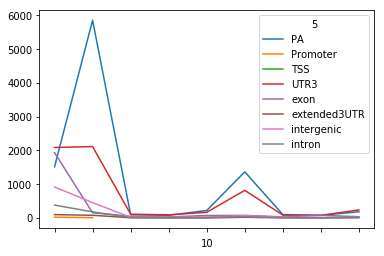

In [114]:
rs_grp1_stack.T.plot()